In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go
import math
import seaborn as sns

### Analisis descriptivo fifa_datos.csv

In [18]:
datos = pd.read_csv('fifa_datos.csv',header=0)

datos.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
#descripcion con int64
datos.describe(include=['int64'])

,Unnamed: 0,ID,Age,Overall,Potential,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000


In [11]:
#descripcion con float64
datos.describe(include=['float64'])

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [12]:
#descripcion categorica
datos.describe(include=[object])

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,...,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,...,660,660,660,713,669,634,634,634,669,557


In [16]:
#correlacion
datos.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


<AxesSubplot:>

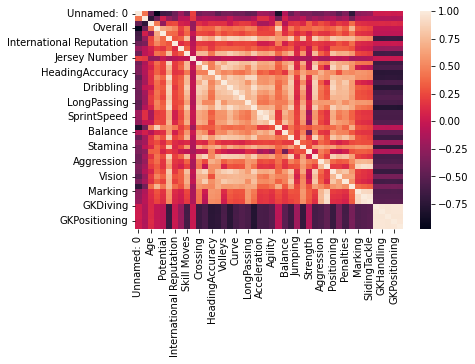

In [17]:
#mapa de calor
sns.heatmap(datos.corr())

### Analisis descriptivo 'Conformación de los Grupos Económicos y su Comportamiento Tributario (4)'

In [19]:
datos = pd.read_excel('datasetmodificado.xlsx',header=0)

datos.head(5)

,Ranking (1) Tamaño 2021,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS (*),No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN


In [21]:
datos['Ranking (1) Tamaño 2021']
#print(datos.columns)

0                                                      1
1                                                      2
2                                                      3
3                                                      4
4                                                      5
                             ...                        
314    (8) Total Recaudado, a través de los formulari...
315    (9) Corresponde a la Cartera: Firme, Suspendid...
316    (*) Especifica si el grupo económico reportó o...
317    (**) Se recuerda que en el presente reporte no...
318    (***) Se refiere a que se han identificado int...
Name: Ranking (1) Tamaño 2021, Length: 319, dtype: object

In [23]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 40 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking (1) Tamaño 2021                                                                                       315 non-null    object 
 1   Ranking (1) Tamaño 2020                                                                                       302 non-null    float64
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    float64
 3   NUEVO GE                                                                                                      50 non-null     object 
 4   Nombre Grupo Económico                                  

In [28]:
#descripcion con float64
datos.describe(include=['float64'])

,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),Sociedades Nacionales (c),Sociedades Extranjeras (d),Contribuyentes Especiales,Grandes Contribuyentes e Importancia Recaudatoria,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
count,302.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,1.0
mean,151.500000,0.000000,3.003300,2.613861,7.069307,2.217822,39.544554,11.062706,7.386139,2.435644,...,4.076260e+05,1.512046e+05,1.447792e+05,8.666017e+08,8.488488e+08,3.141654e+08,3.075412e+08,3.643370e+07,4.042244e+07,0.0
std,87.324109,14.639182,26.387898,23.125902,61.468550,19.462277,344.081334,96.641685,64.275685,21.195752,...,3.573969e+06,1.470556e+06,1.389845e+06,7.632850e+09,7.470386e+09,2.746678e+09,2.689186e+09,3.204688e+08,3.553322e+08,NaN
min,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02,0.0
25%,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,...,4.785650e+02,0.000000e+00,0.000000e+00,6.283528e+07,6.591704e+07,2.529118e+07,2.371852e+07,1.698178e+06,2.069227e+06,0.0
50%,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,13.000000,2.000000,2.000000,1.000000,...,1.654349e+04,0.000000e+00,0.000000e+00,1.381787e+08,1.440114e+08,5.515283e+07,5.398364e+07,5.099821e+06,6.119566e+06,0.0
75%,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,24.000000,6.000000,4.000000,1.000000,...,1.156632e+05,0.000000e+00,0.000000e+00,3.574288e+08,3.574384e+08,1.513844e+08,1.499963e+08,1.143406e+07,1.489997e+07,0.0
max,302.000000,49.000000,455.000000,396.000000,1071.000000,336.000000,5991.000000,1676.000000,1119.000000,369.000000,...,6.175535e+07,2.290750e+07,2.193405e+07,1.312902e+11,1.286006e+11,4.759606e+10,4.659249e+10,5.519706e+09,6.124000e+09,0.0


In [29]:
#descripcion categorica
datos.describe(include=[object])

,Ranking (1) Tamaño 2021,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS (*)
count,315,50,304,303
unique,315,2,304,4
top,1,X,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",SI
freq,1,49,1,202


In [30]:
#correlacion
datos.corr()

,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),Sociedades Nacionales (c),Sociedades Extranjeras (d),Contribuyentes Especiales,Grandes Contribuyentes e Importancia Recaudatoria,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
Ranking (1) Tamaño 2020,1.000000,0.083821,-0.269652,-0.228743,-0.212931,-0.214241,-0.391660,-0.326254,-0.422756,-0.574845,...,-0.327911,-0.180576,-0.193799,-0.397270,-0.406443,-0.515890,-0.510426,-0.409314,-0.410234,NaN
Variación Ranking Tamaño 2020 - 2021,0.083821,1.000000,-0.037331,-0.008270,-0.012513,-0.012018,0.021413,-0.057249,-0.044845,-0.087162,...,-0.024856,0.007613,0.007461,0.013523,0.000615,0.025729,0.010224,-0.010183,-0.027013,NaN
No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),-0.269652,-0.037331,1.000000,0.984697,0.987176,0.987312,0.991365,0.996213,0.991875,0.991703,...,0.986075,0.884570,0.897068,0.980431,0.981483,0.986397,0.986655,0.978975,0.980168,NaN
No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),-0.228743,-0.008270,0.984697,1.000000,0.981568,0.977719,0.984923,0.986422,0.986000,0.986262,...,0.981709,0.875291,0.887497,0.972589,0.973712,0.980402,0.980732,0.969372,0.970883,NaN
Personas Naturales (a),-0.212931,-0.012513,0.987176,0.981568,1.000000,0.985860,0.997844,0.990931,0.996825,0.995782,...,0.988220,0.890645,0.902677,0.983801,0.984582,0.991474,0.991333,0.983659,0.984382,NaN
Personas Extranjeras (b),-0.214241,-0.012018,0.987312,0.977719,0.985860,1.000000,0.988261,0.992530,0.989410,0.990174,...,0.985378,0.884895,0.896404,0.977158,0.978051,0.983859,0.983970,0.976834,0.978059,NaN
Sociedades Nacionales (c),-0.391660,0.021413,0.991365,0.984923,0.997844,0.988261,1.000000,0.994324,0.999166,0.997758,...,0.991000,0.893431,0.906175,0.988342,0.989092,0.994482,0.994489,0.986456,0.987520,NaN
Sociedades Extranjeras (d),-0.326254,-0.057249,0.996213,0.986422,0.990931,0.992530,0.994324,1.000000,0.995499,0.995868,...,0.989868,0.887913,0.900227,0.984438,0.985475,0.991294,0.991429,0.985280,0.986109,NaN
Contribuyentes Especiales,-0.422756,-0.044845,0.991875,0.986000,0.996825,0.989410,0.999166,0.995499,1.000000,0.998595,...,0.992028,0.891369,0.903661,0.987703,0.988596,0.994580,0.994624,0.986403,0.987454,NaN
Grandes Contribuyentes e Importancia Recaudatoria,-0.574845,-0.087162,0.991703,0.986262,0.995782,0.990174,0.997758,0.995868,0.998595,1.000000,...,0.992833,0.892361,0.904597,0.988756,0.989670,0.995525,0.995607,0.988462,0.989276,NaN


<AxesSubplot:>

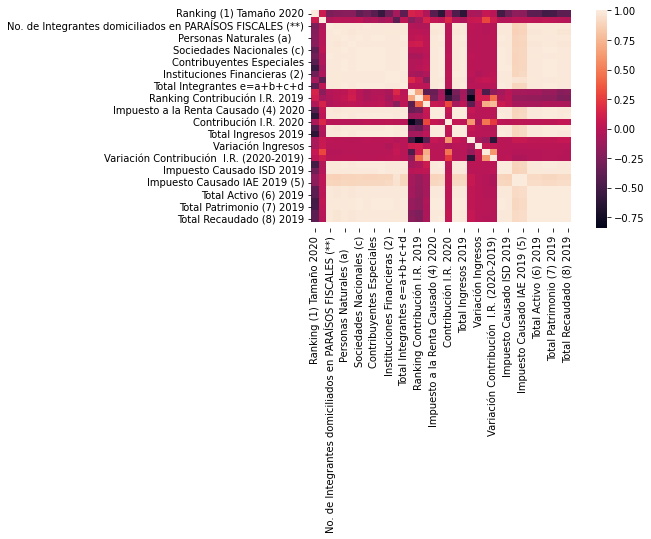

In [31]:
#mapa de calor
sns.heatmap(datos.corr())